In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale = 2)
from skimpy import clean_columns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train = clean_columns(train)
test = clean_columns(test)

14 column names have been cleaned

13 column names have been cleaned

In [6]:
train.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
r1,c1 = train.shape
print(f"The Training data has {r1} rows and {c1} columns.")
r2,c2 = test.shape
print(f"The Testing data has {r2} rows and {c2} columns.")

The Training data has 8693 rows and 14 columns.
The Testing data has 4277 rows and 13 columns.


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   passenger_id   8693 non-null   object 
 1   home_planet    8492 non-null   object 
 2   cryo_sleep     8476 non-null   object 
 3   cabin          8494 non-null   object 
 4   destination    8511 non-null   object 
 5   age            8514 non-null   float64
 6   vip            8490 non-null   object 
 7   room_service   8512 non-null   float64
 8   food_court     8510 non-null   float64
 9   shopping_mall  8485 non-null   float64
 10  spa            8510 non-null   float64
 11  vr_deck        8505 non-null   float64
 12  name           8493 non-null   object 
 13  transported    8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
train.describe()

,age,room_service,food_court,shopping_mall,spa,vr_deck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
test.describe()

,age,room_service,food_court,shopping_mall,spa,vr_deck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [18]:
print("MISSING VALUES IN TRAINING DATA")
print(train.isnull().sum().nlargest(c1))
print('-'*50)
print("MISSING VALUES IN TESTING DATA")
print(test.isnull().sum().nlargest(c2))

MISSING VALUES IN TRAINING DATA
cryo_sleep       217
shopping_mall    208
vip              203
home_planet      201
name             200
cabin            199
vr_deck          188
food_court       183
spa              183
destination      182
room_service     181
age              179
passenger_id       0
transported        0
dtype: int64
--------------------------------------------------
MISSING VALUES IN TESTING DATA
food_court       106
spa              101
cabin            100
shopping_mall     98
name              94
cryo_sleep        93
vip               93
destination       92
age               91
home_planet       87
room_service      82
vr_deck           80
passenger_id       0
dtype: int64


In [123]:
# train.set_index('passenger_id',inplace=True)
test.set_index('passenger_id',inplace=True)

In [35]:
train[['room_service','food_court','shopping_mall','spa','vr_deck']] = train[['room_service','food_court','shopping_mall','spa','vr_deck']].fillna(0)
test[['room_service','food_court','shopping_mall','spa','vr_deck']] = test[['room_service','food_court','shopping_mall','spa','vr_deck']].fillna(0)

train['age'] = train['age'].fillna(train['age'].median())
test['age'] = test['age'].fillna(test['age'].median())

train['vip'] =train['vip'].fillna(False)
test['vip'] =test['vip'].fillna(False)

train['home_planet'] = train['home_planet'].fillna('Mars')
test['home_planet'] = test['home_planet'].fillna('Mars')

train['destination']= train['destination'].fillna("PSO J318.5-22")
test['destination']= test['destination'].fillna("PSO J318.5-22")

train['cryo_sleep'] = train['cryo_sleep'].fillna(False)
test['cryo_sleep'] = test['cryo_sleep'].fillna(False)

train['cabin'] = train['cabin'].fillna('T/0/P')
test['cabin'] = test['cabin'].fillna('T/0/P')

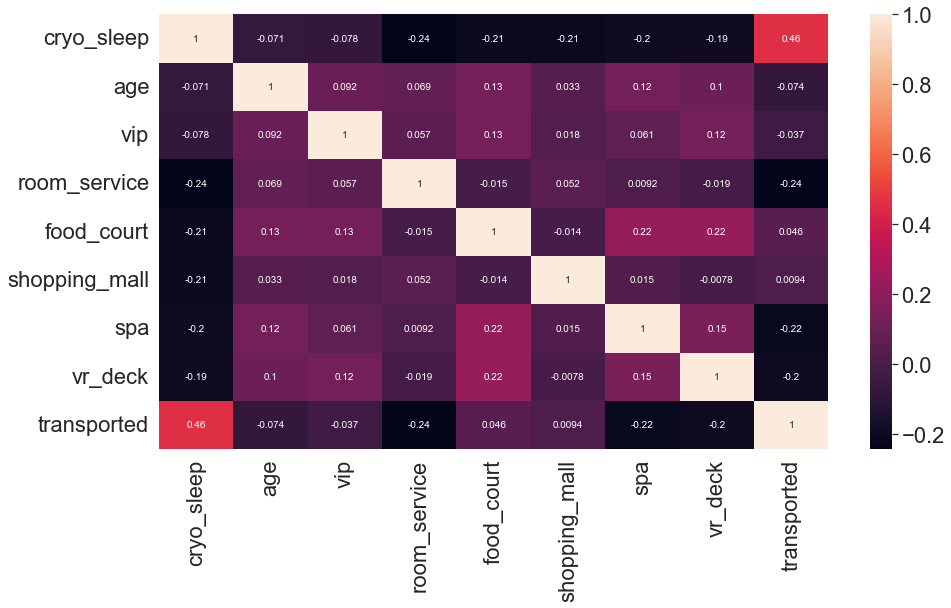

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True);

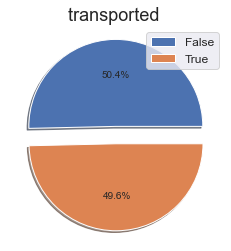

In [39]:
plt.pie(train.transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('transported ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

<AxesSubplot:xlabel='transported', ylabel='count'>

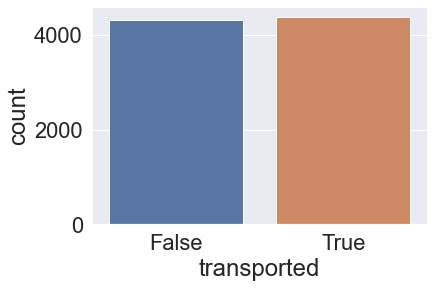

In [48]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train.transported)

<AxesSubplot:xlabel='home_planet', ylabel='count'>

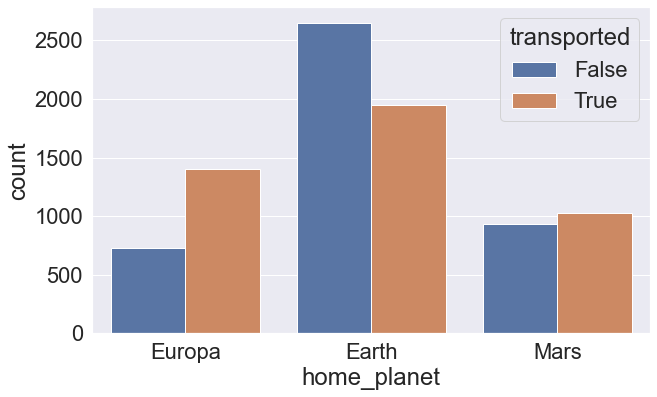

In [46]:
fig = plt.figure(figsize=(10,6))
sns.countplot(train.home_planet,hue=train.transported)

<AxesSubplot:xlabel='vip', ylabel='count'>

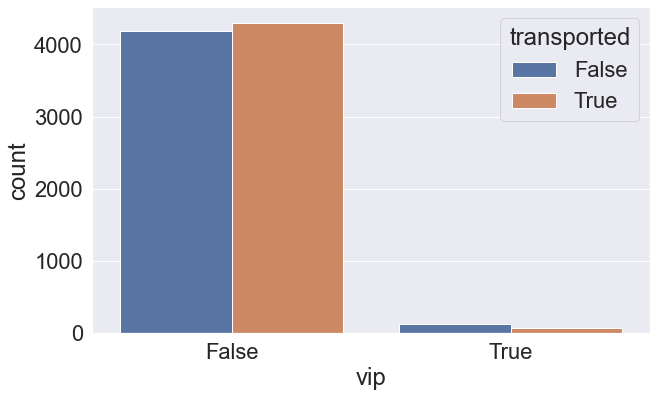

In [49]:
fig = plt.figure(figsize=(10,6))
sns.countplot(train.vip,hue=train.transported)

<AxesSubplot:xlabel='cryo_sleep', ylabel='count'>

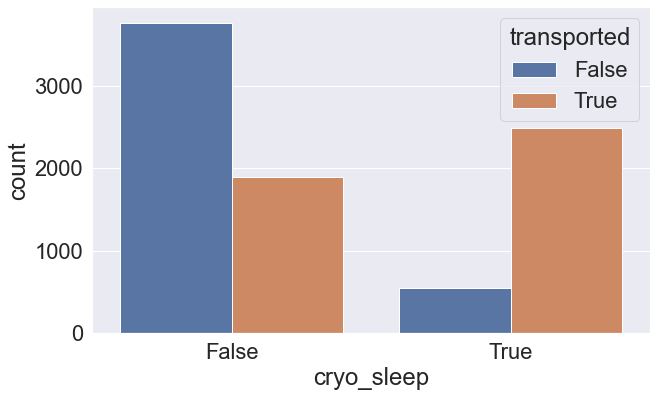

In [51]:
fig = plt.figure(figsize=(10,6))
sns.countplot(train.cryo_sleep,hue=train.transported)

<AxesSubplot:xlabel='destination', ylabel='count'>

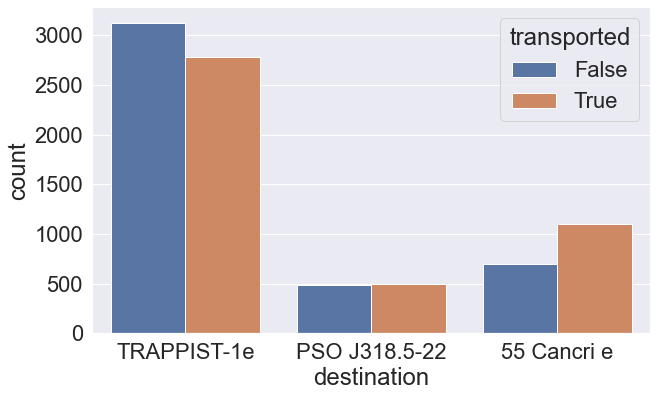

In [52]:
fig = plt.figure(figsize=(10,6))
sns.countplot(train.destination,hue=train.transported)

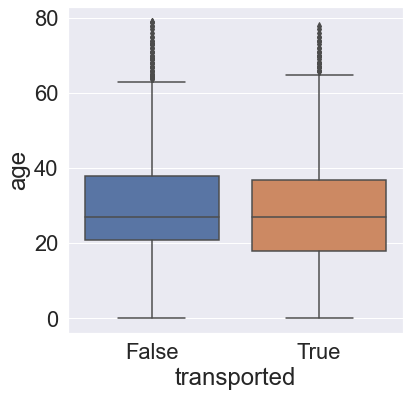

In [54]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y=train.age,x=train.transported);

In [55]:
train[['Deck','Num','Side']] = train.cabin.str.split('/',expand=True)
test[['Deck','Num','Side']] = test.cabin.str.split('/',expand=True)

In [57]:
train['total_spent']= train['room_service']+ train['food_court']+ train['shopping_mall']+ train['spa']+ train['vr_deck']
test['total_spent']=test['room_service']+test['food_court']+test['shopping_mall']+test['spa']+test['vr_deck']

In [58]:
train['age_group'] = 0
for i in range(6):
    train.loc[(train.age >= 10*i) & (train.age < 10*(i + 1)), 'age_group'] = i

test['age_group'] = 0
for i in range(6):
    test.loc[(test.age >= 10*i) & (test.age < 10*(i + 1)), 'age_group'] = i

<AxesSubplot:xlabel='count', ylabel='age_group'>

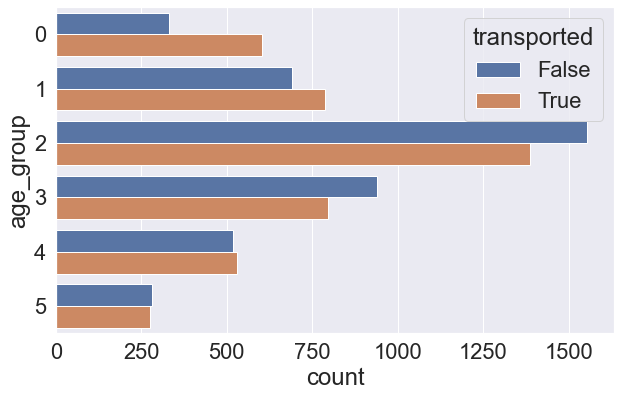

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(y=train['age_group'],hue=train['transported'])

In [60]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['home_planet','cryo_sleep','destination','vip','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((train[i], test[i])).astype(str)
    le.fit(arr)
    train[i]=le.transform(train[i].astype(str))
    test[i]=le.transform(test[i].astype(str))

home_planet
cryo_sleep
destination
vip
Deck
Side
Num


In [61]:
train.head()

,home_planet,cryo_sleep,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported,Deck,Num,Side,total_spent,age_group
passenger_id,,,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0,3
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0,2
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0,5
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0,3
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0,1


In [62]:
test = test.drop(columns=['name','cabin'],axis=1)
train = train.drop(columns=['name','cabin'],axis=1)

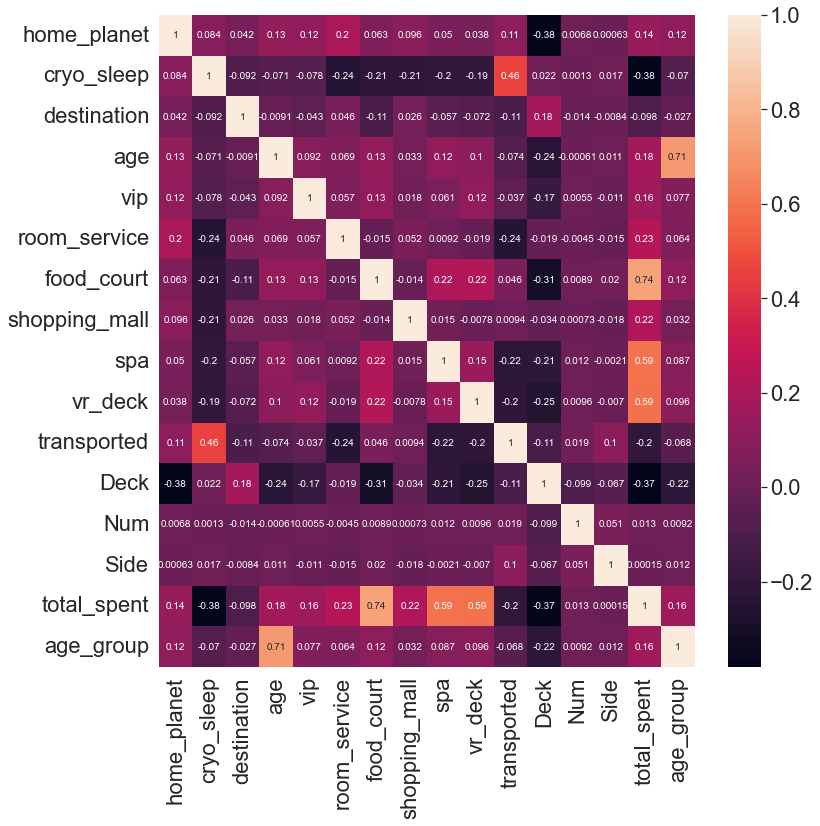

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True);

In [66]:
train['transported']=train['transported'].replace({True:1,False:0})

In [67]:
X = train.drop('transported',axis=1)
y = train['transported']

In [68]:
X.columns

Index(['home_planet', 'cryo_sleep', 'destination', 'age', 'vip',
       'room_service', 'food_court', 'shopping_mall', 'spa', 'vr_deck', 'Deck',
       'Num', 'Side', 'total_spent', 'age_group'],
      dtype='object')

In [69]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

pred_y=model.predict(X_val)
pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.7764994631078386
0.7920883164673413


In [75]:
model = CatBoostClassifier(iterations=1500,eval_metric='Accuracy',verbose=0)
model.fit(X_train,y_train)

pred_y=model.predict(X_val)
pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8828041110599785
0.8224471021159153


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)

gb.fit(X_train,y_train)

pred_y=gb.predict(X_val)
pred=gb.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8696119036662064
0.81278748850046


In [76]:
model.fit(X,y)

In [77]:
for i,z in zip(X.columns,model.get_feature_importance()):
    print('importance of',i,'is',z)

importance of home_planet is 8.160513975786106
importance of cryo_sleep is 4.7013456184530025
importance of destination is 2.393081923525892
importance of age is 5.126439274507986
importance of vip is 0.10828162130174977
importance of room_service is 5.875480047893342
importance of food_court is 7.893822762194019
importance of shopping_mall is 4.496323111836975
importance of spa is 9.426856892675925
importance of vr_deck is 8.585295660177284
importance of Deck is 14.602863777874214
importance of Num is 8.891779133600641
importance of Side is 4.3277156570498745
importance of total_spent is 13.785245978119413
importance of age_group is 1.6249545650035755


In [124]:
y_pred = model.predict(test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)}, index = test.index)
sub.head()

,Transported
passenger_id,
0013_01,False
0018_01,False
0019_01,True
0021_01,True
0023_01,False
